SS991

In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.targets


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml

# Load the Forest Cover Type dataset
covertype = fetch_openml(name="covertype", version=4)
X = covertype.data
y = covertype.target.astype('int')


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**How does the dataset look like?**

In [3]:
# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
X.head()



First few rows of the dataset:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0,0,0,0,0,0,0,0,0,0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0,0,0,0,0,0,0,0,0,0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0,0,0,0,0,0,0,0,0,0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0,0,0,0,0,0,0,0,0,0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for SGD)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


How do we preprocess the data for SGDClassifier?

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for SGD)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


How do we initialize and train the SGDClassifier?

In [6]:
# Initialize and train the SGDClassifier
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train_scaled, y_train)


SGDClassifier(random_state=42)

How do we make predictions and evaluate the model?

In [7]:
# Make predictions on the test set
y_pred = sgd_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation results
print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)



Model Evaluation:
Accuracy: 0.7114446270750325
Confusion Matrix:
 [[29089 12275    30     0     0    34  1129]
 [10027 44779  1058     0     2   479   155]
 [    0   733  5962   150     4   272     0]
 [    0     0   313   181     0    32     0]
 [   26  1654   213     0     0   102     0]
 [    0  1150  1909    11     0   419     0]
 [ 1731    25    17     0     0     0  2242]]
Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.68      0.70     42557
           2       0.74      0.79      0.76     56500
           3       0.63      0.84      0.72      7121
           4       0.53      0.34      0.42       526
           5       0.00      0.00      0.00      1995
           6       0.31      0.12      0.17      3489
           7       0.64      0.56      0.59      4015

    accuracy                           0.71    116203
   macro avg       0.51      0.48      0.48    116203
weighted avg       0.69      0.71      0.70    1162

Display variable information

In [8]:
# Display variable information
print("\nVariable Information:")
print(covertype.feature_names)



Variable Information:
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']


**What are the summary statistics of the dataset?**

In [9]:
# Display summary statistics of the dataset
print("\nSummary Statistics:")
X.describe()



Summary Statistics:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


**How are the target labels distributed?**

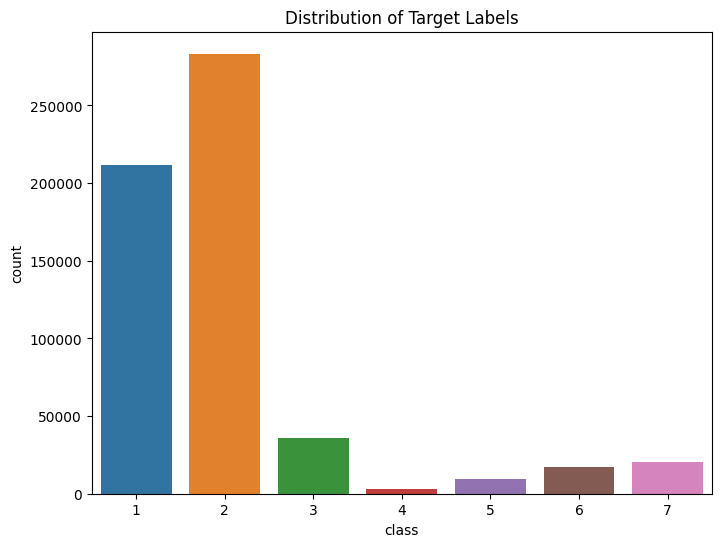

In [10]:
# Display the distribution of target labels
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Distribution of Target Labels")
plt.show()


**Can we visualize the relationships between some key features?**

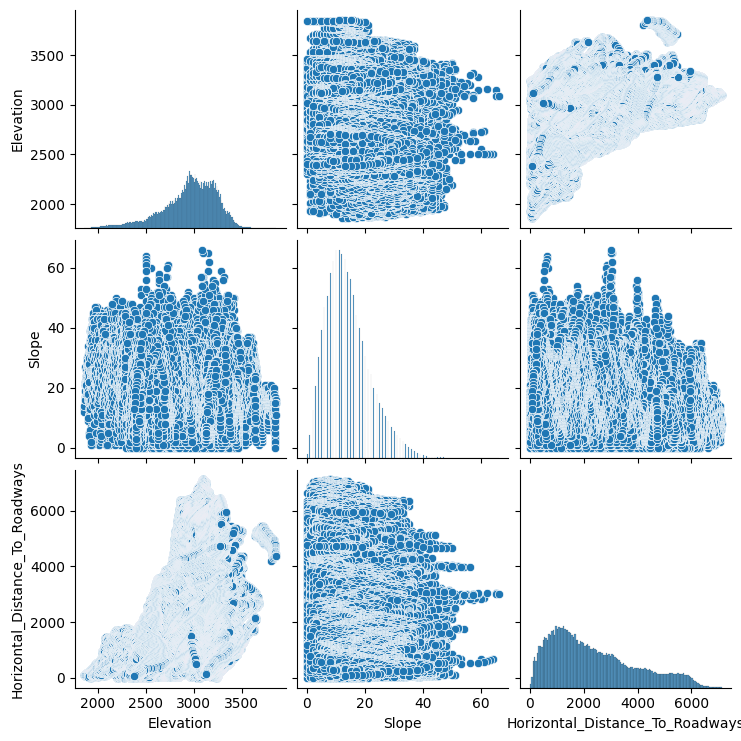

In [11]:
# Visualize relationships between features (e.g., Elevation, Slope)
sns.pairplot(X[['Elevation', 'Slope', 'Horizontal_Distance_To_Roadways']])
plt.show()


**How sensitive is the model to different hyperparameter values?**

In [12]:
# Experiment with different learning rates and penalties
learning_rates = [0.001, 0.01, 0.1]
penalties = ['l1', 'l2']

for lr in learning_rates:
    for penalty in penalties:
        sgd_classifier = SGDClassifier(learning_rate='constant', eta0=lr, penalty=penalty, random_state=42)
        sgd_classifier.fit(X_train_scaled, y_train)
        y_pred = sgd_classifier.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Learning Rate: {lr}, Penalty: {penalty}, Accuracy: {accuracy:.4f}")


Learning Rate: 0.001, Penalty: l1, Accuracy: 0.7080
Learning Rate: 0.001, Penalty: l2, Accuracy: 0.7093
Learning Rate: 0.01, Penalty: l1, Accuracy: 0.7049
Learning Rate: 0.01, Penalty: l2, Accuracy: 0.6865
Learning Rate: 0.1, Penalty: l1, Accuracy: 0.6467
Learning Rate: 0.1, Penalty: l2, Accuracy: 0.6694


**Are there any correlations between features?**

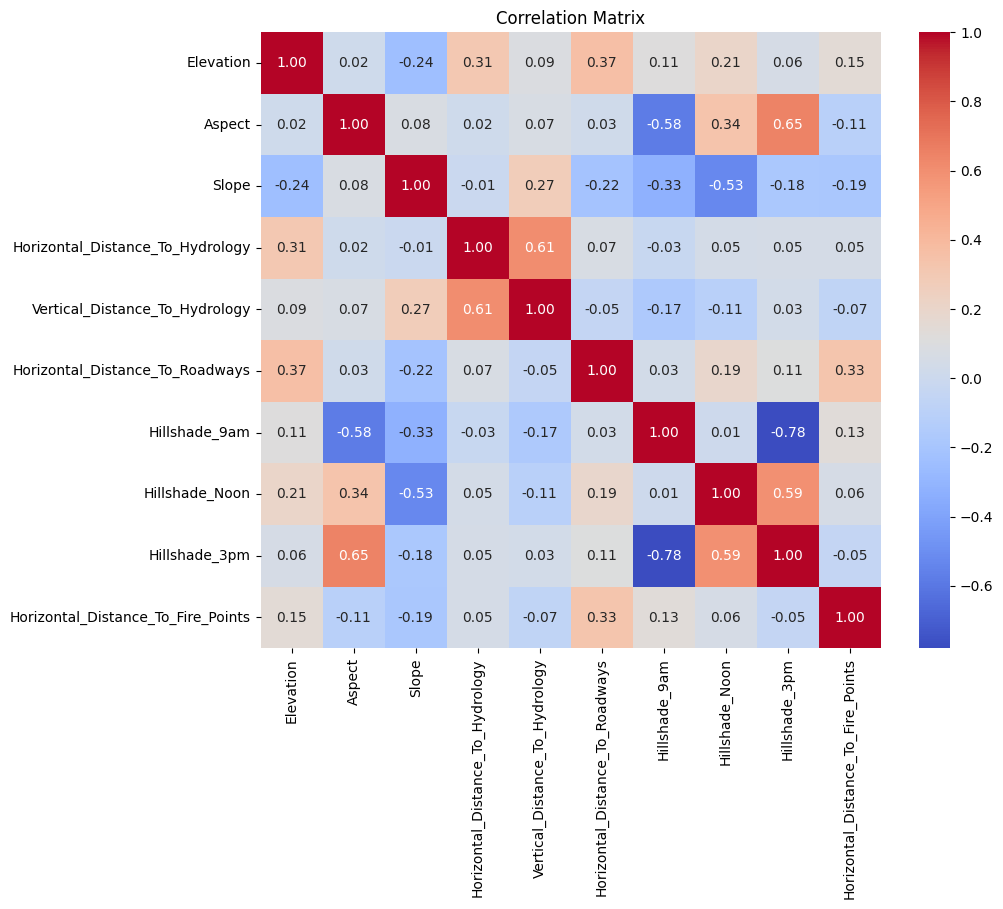

In [13]:
# Display a correlation matrix
correlation_matrix = X.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



**What are the most important features according to the trained model?**

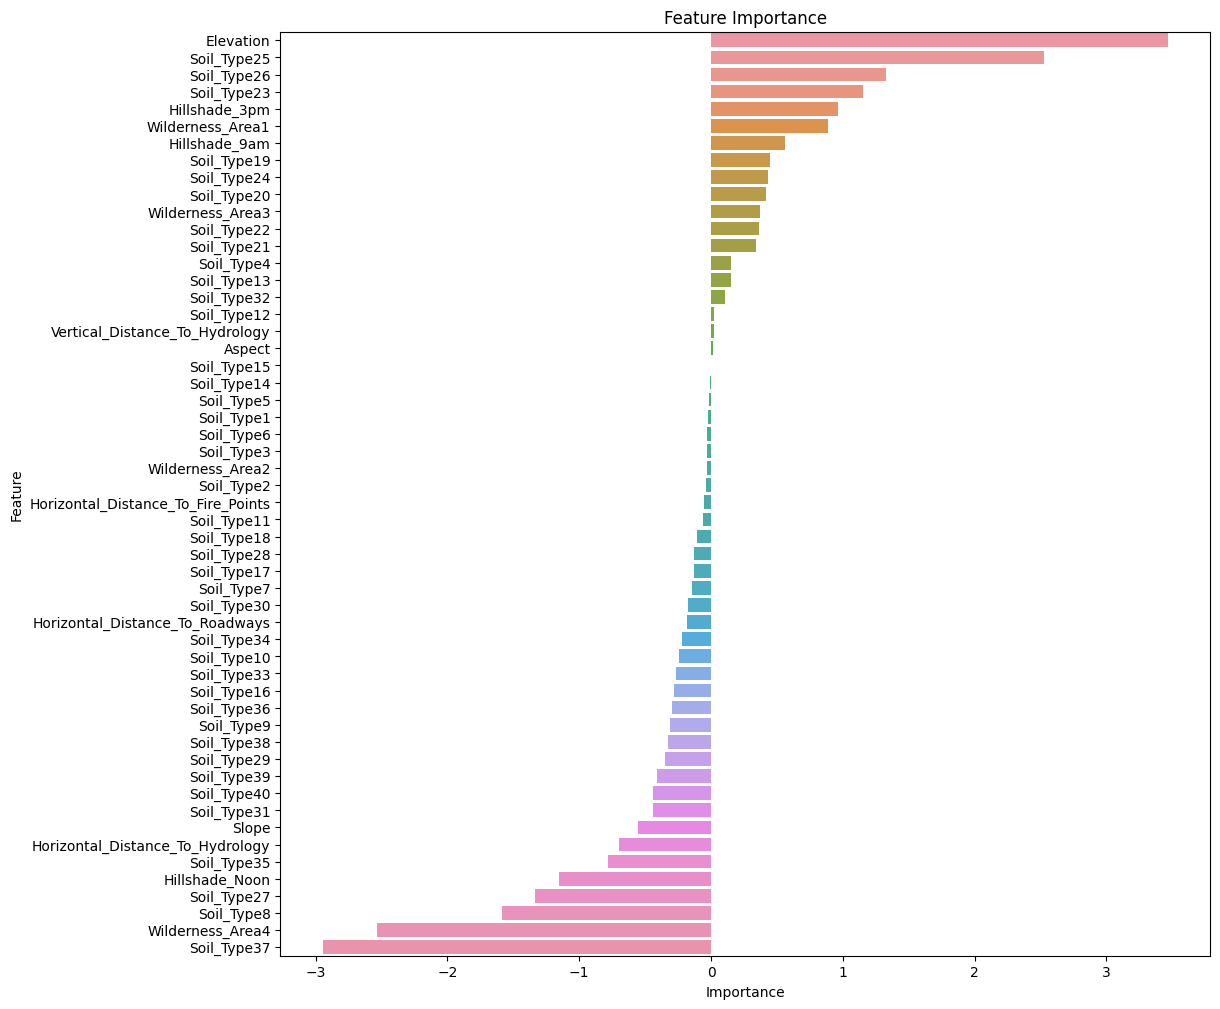

In [14]:
# Display feature importance
feature_importance = sgd_classifier.coef_[0]
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 12))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance")
plt.show()


**How does the model perform with different batch sizes during training?**

In [15]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Experiment with different batch sizes
batch_sizes = [32, 64, 128]

for batch_size in batch_sizes:
    sgd_classifier_batch = SGDClassifier(random_state=42, max_iter=1000)

    # Use partial_fit to fit the model with the specified batch size
    for i in range(0, len(X_train_scaled), batch_size):
        X_batch = X_train_scaled[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]
        sgd_classifier_batch.partial_fit(X_batch, y_batch, classes=np.unique(y_train))

    y_pred_batch = sgd_classifier_batch.predict(X_test_scaled)
    accuracy_batch = accuracy_score(y_test, y_pred_batch)
    print(f"Batch Size: {batch_size}, Accuracy: {accuracy_batch:.4f}")


Batch Size: 32, Accuracy: 0.6518
Batch Size: 64, Accuracy: 0.6558
Batch Size: 128, Accuracy: 0.6560


**How does the model performance change with different numbers of iterations?**

In [16]:
# Experiment with different numbers of iterations
iterations = [100, 500, 1000]

for iteration in iterations:
    sgd_classifier_iter = SGDClassifier(random_state=42, max_iter=iteration)
    sgd_classifier_iter.fit(X_train_scaled, y_train)
    y_pred_iter = sgd_classifier_iter.predict(X_test_scaled)
    accuracy_iter = accuracy_score(y_test, y_pred_iter)
    print(f"Iterations: {iteration}, Accuracy: {accuracy_iter:.4f}")


Iterations: 100, Accuracy: 0.7114
Iterations: 500, Accuracy: 0.7114
Iterations: 1000, Accuracy: 0.7114


**How does the model perform with different learning rates?**

In [17]:
# Experiment with different learning rates
learning_rates = [0.001, 0.01, 0.1]

for lr in learning_rates:
    sgd_classifier_lr = SGDClassifier(random_state=42, max_iter=1000, learning_rate='constant', eta0=lr)
    sgd_classifier_lr.fit(X_train_scaled, y_train)
    y_pred_lr = sgd_classifier_lr.predict(X_test_scaled)
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    print(f"Learning Rate: {lr}, Accuracy: {accuracy_lr:.4f}")


Learning Rate: 0.001, Accuracy: 0.7093
Learning Rate: 0.01, Accuracy: 0.6865
Learning Rate: 0.1, Accuracy: 0.6694


**How does the model perform with different regularization penalties?**

In [18]:
# Experiment with different regularization penalties
penalties = ['l1', 'l2']

for penalty in penalties:
    sgd_classifier_penalty = SGDClassifier(random_state=42, max_iter=1000, penalty=penalty)
    sgd_classifier_penalty.fit(X_train_scaled, y_train)
    y_pred_penalty = sgd_classifier_penalty.predict(X_test_scaled)
    accuracy_penalty = accuracy_score(y_test, y_pred_penalty)
    print(f"Penalty: {penalty}, Accuracy: {accuracy_penalty:.4f}")


Penalty: l1, Accuracy: 0.7084
Penalty: l2, Accuracy: 0.7114


**How does the model perform with different alpha values for regularization?**

In [19]:
# Experiment with different alpha values (regularization strength)
alphas = [0.0001, 0.001, 0.01]

for alpha in alphas:
    sgd_classifier_alpha = SGDClassifier(random_state=42, max_iter=1000, alpha=alpha)
    sgd_classifier_alpha.fit(X_train_scaled, y_train)
    y_pred_alpha = sgd_classifier_alpha.predict(X_test_scaled)
    accuracy_alpha = accuracy_score(y_test, y_pred_alpha)
    print(f"Alpha: {alpha}, Accuracy: {accuracy_alpha:.4f}")


Alpha: 0.0001, Accuracy: 0.7114
Alpha: 0.001, Accuracy: 0.7136
Alpha: 0.01, Accuracy: 0.7096


**Can we visualize the confusion matrix as a heatmap?**

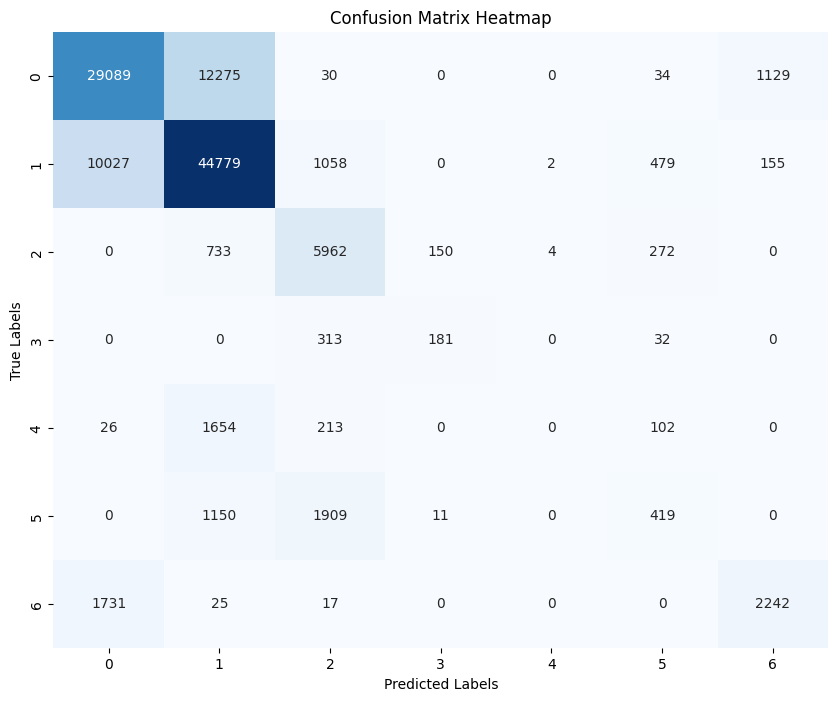

In [20]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


**How does the distribution of the target labels vary across different features?**

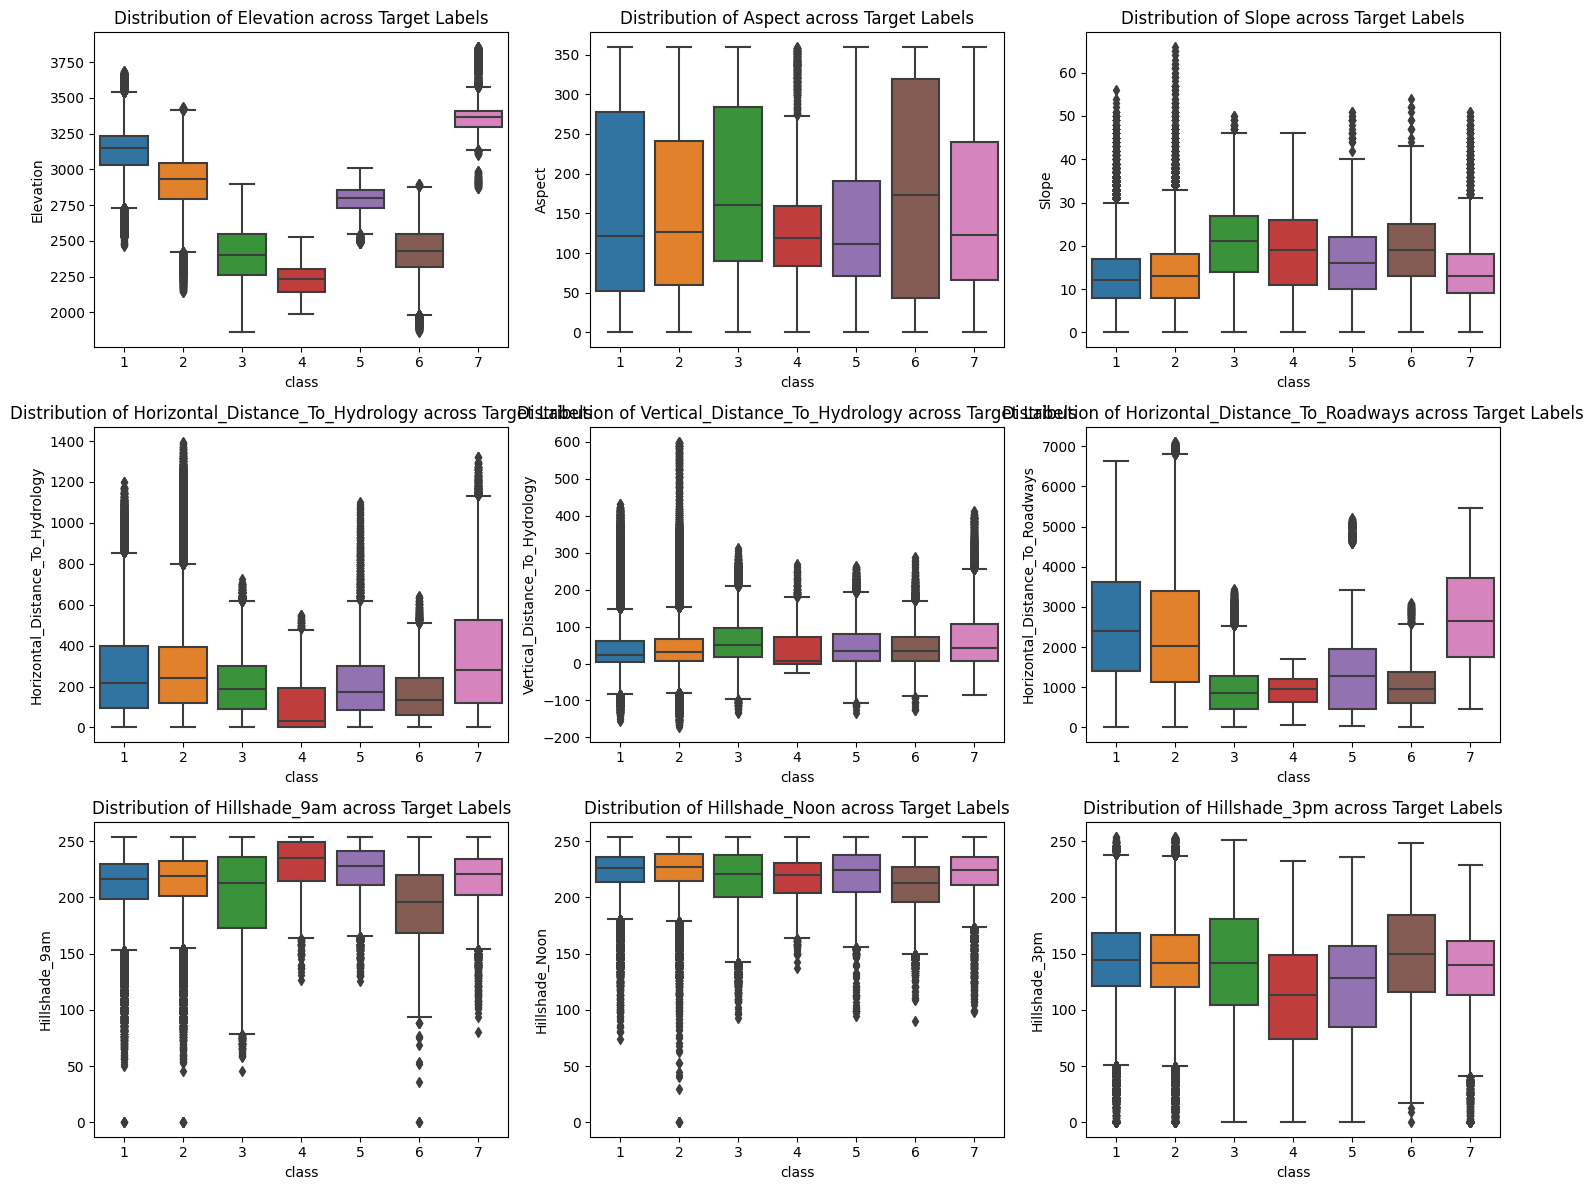

In [21]:
# Visualize the distribution of target labels across different features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, ax in enumerate(axes.flatten()):
    if i < len(X.columns):
        sns.boxplot(x=y, y=X[X.columns[i]], ax=ax)
        ax.set_title(f'Distribution of {X.columns[i]} across Target Labels')

plt.tight_layout()
plt.show()


**What is the class distribution of the target labels?**

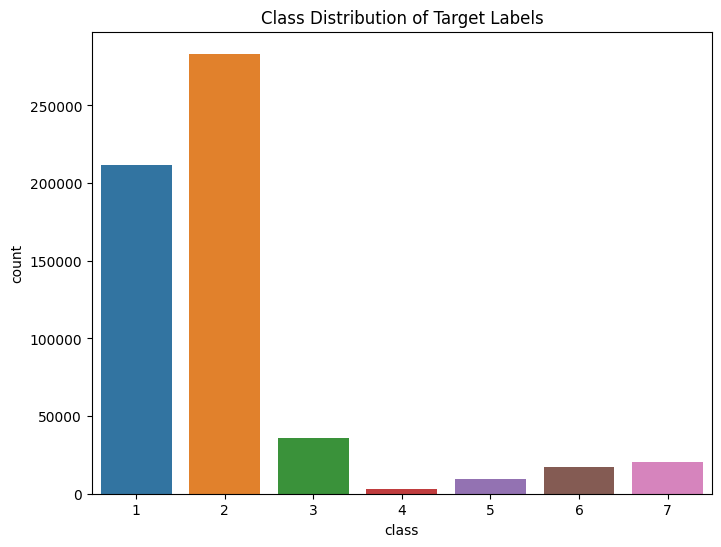

In [22]:
# Visualize the class distribution of the target labels
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Class Distribution of Target Labels")
plt.show()


**Are there any outliers in the dataset?**

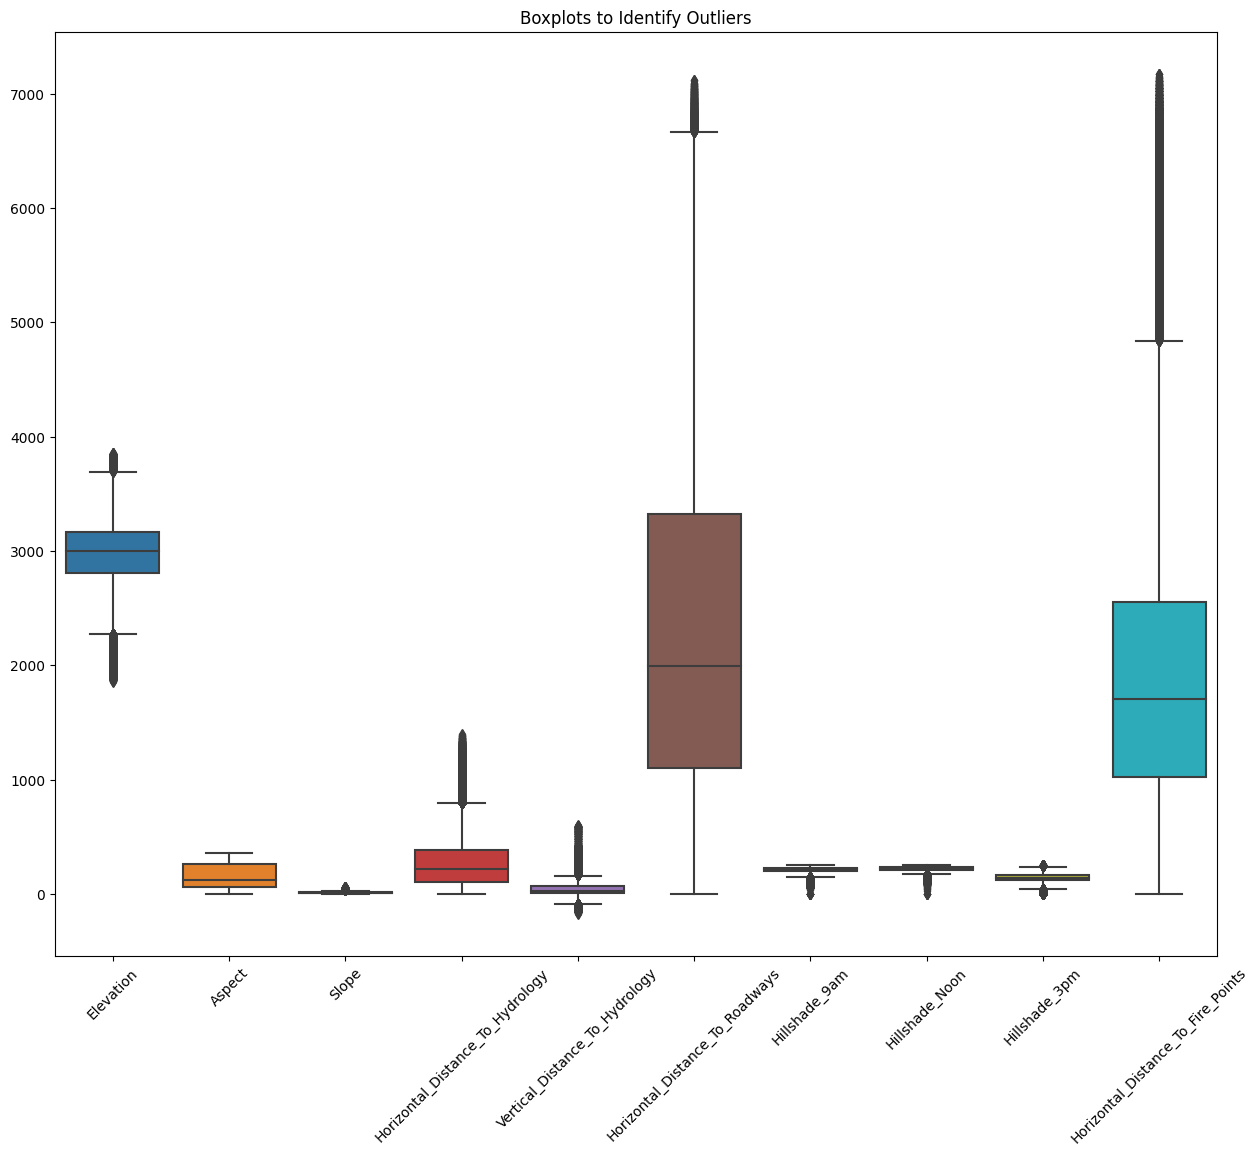

In [23]:
# Visualize boxplots to identify outliers
plt.figure(figsize=(15, 12))
sns.boxplot(data=X)
plt.title("Boxplots to Identify Outliers")
plt.xticks(rotation=45)
plt.show()
